In [1]:
import numpy as np
from skimage import io, transform
import os
import sys
import matplotlib.pyplot as plt
import math
import time
import argparse
import ast
import scipy.io as sio
import copy
from visualize import show, showMesh, showImage, showLandmark, showLandmark2
import pickle
from dataloader import ImageData
from torchmodel import TorchNet
from dataloader import getDataLoader, DataGenerator
from loss import getErrorFunction, getLossFunction
import masks
from data import getColors
import torch
from torch.utils.tensorboard import SummaryWriter
import random

In [2]:
def addImageData(data_dir, add_mode='train', split_rate=0.8):
    all_data = []
    for root, dirs, files in os.walk(data_dir):
        for dir_name in dirs:
            image_name = dir_name
            if not os.path.exists(root + '/' + dir_name + '/' + image_name + '_cropped.jpg'):
                print('skip ', root + '/' + dir_name)
                continue
            temp_image_data = ImageData()
            temp_image_data.readPath(root + '/' + dir_name)
            all_data.append(temp_image_data)
    print(len(all_data), 'data added')
    return all_data

In [3]:
dataset=addImageData('data/images/AFLW2000-full')

skip  data/images/AFLW2000-full/Code
skip  data/images/AFLW2000-full\Code/Mex
skip  data/images/AFLW2000-full\Code/ModelGeneration
2000 data added


In [4]:
from data import mean_posmap
posmaps=np.zeros((2000,256,256,3)).astype(np.float16)
diffmaps=np.zeros((2000,256,256,3)).astype(np.float16)
for i in range(2000):
    posmaps[i]=dataset[i].getPosmap().astype(np.float16)
    diffmaps[i]=dataset[i].getOffsetPosmap().astype(np.float16)

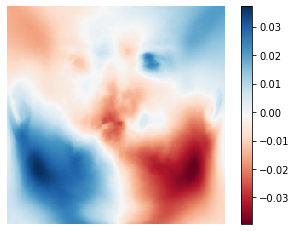

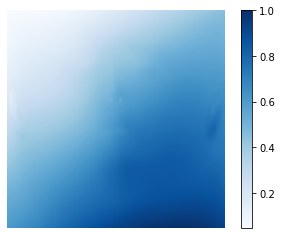

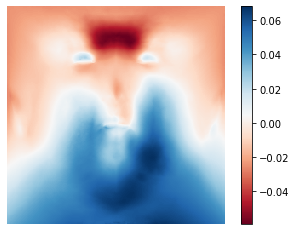

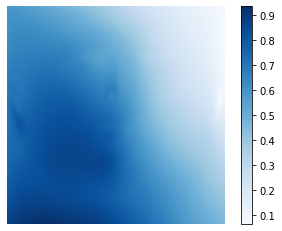

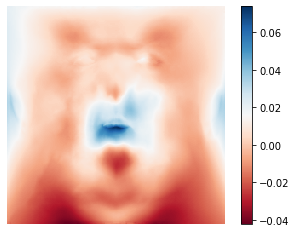

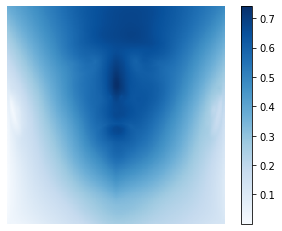

In [81]:
from data import face_mask_np
pos=dataset[3].getPosmap()
offset=dataset[3].getOffsetPosmap()

for i in range(3):
    plt.axis('off')
    plt.imshow(offset[:,:,i]/mean_posmap.max(),cmap='RdBu')
    plt.colorbar()
    plt.show()
    plt.axis('off')
    plt.imshow(pos[:,:,i]/pos.max(),cmap='Blues' )
    plt.colorbar()
    plt.show()


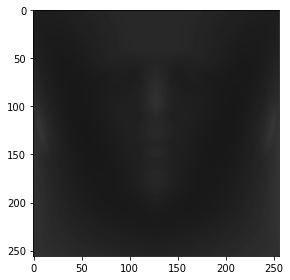

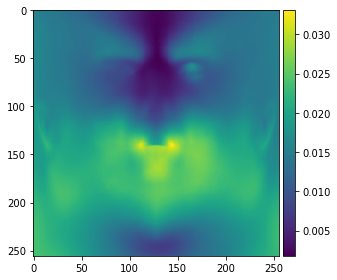

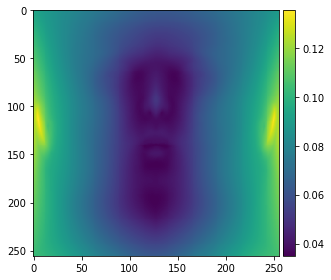

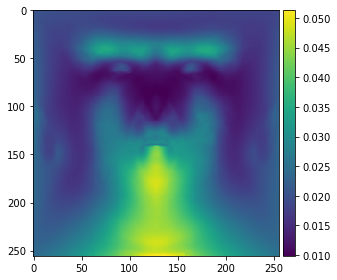

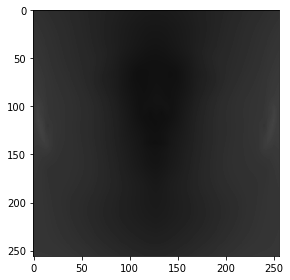

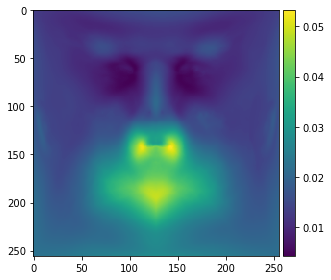

In [93]:
stdpos=np.zeros((256,256,3))
stddiff=np.zeros((256,256,3))
stdallpos=np.zeros((256,256))
stdalldiff=np.zeros((256,256))
for i in range(256):
    for j in range(256):
        stdallpos[i,j]=np.std(posmaps[:,i,j,:],ddof=1)
        stdalldiff[i,j]=np.std(diffmaps[:,i,j,:],ddof=1)
        for k in range(3):
            stdpos[i,j,k]=np.std(posmaps[:,i,j,k]/256.,ddof=1)
            stddiff[i,j,k]=np.std(diffmaps[:,i,j,k]/mean_posmap.max(),ddof=1)
for i in range(3):
    io.imshow(stdpos[:,:,i])
    plt.show()
    io.imshow(stddiff[:,:,i])
    plt.show()

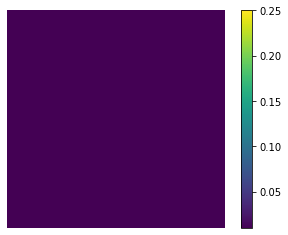

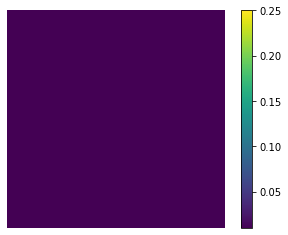

0.0
0.0


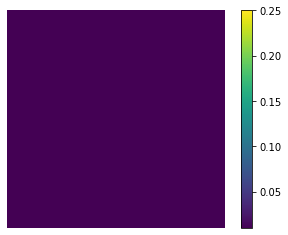

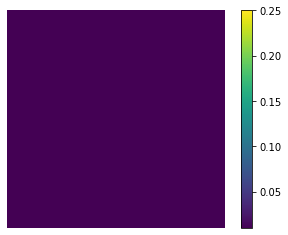

0.0
0.0


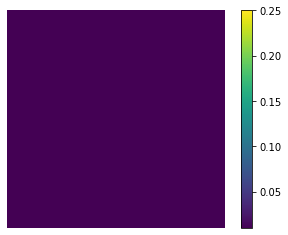

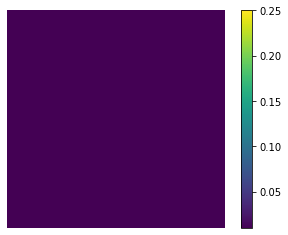

0.0
0.0


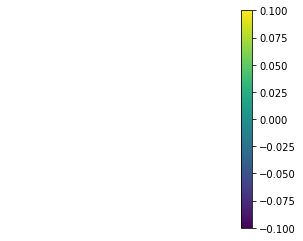

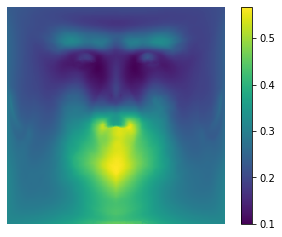

In [92]:
plt.axis('off')
for i in range(3):
    plt.axis('off')
    plt.imshow(stdpos[:,:,i],cmap='viridis',vmax=0.25,vmin=0.01)
    plt.colorbar(shrink=1)
    plt.show()

    plt.axis('off')
    plt.imshow(stddiff[:,:,i],cmap='viridis',vmax=0.25,vmin=0.01)
    plt.colorbar(shrink=1)
    plt.show()
    print(stddiff[:,:,i].mean())
    print(stdpos[:,:,i].mean())
    
plt.axis('off')
plt.imshow(stdallpos,cmap='viridis')
plt.colorbar(shrink=1)
plt.show()
plt.axis('off')
plt.imshow(stdalldiff,cmap='viridis')
plt.colorbar(shrink=1)
plt.show()

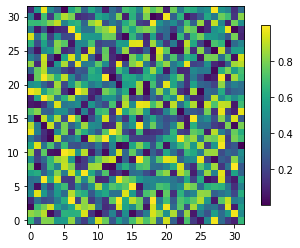

In [75]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
 
n = 10

image=np.random.rand(32,32)
plt.axis('on')
plt.imshow(image, cmap='viridis', origin='low')
plt.colorbar(shrink=.83)
 
plt.show()

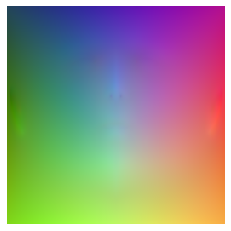

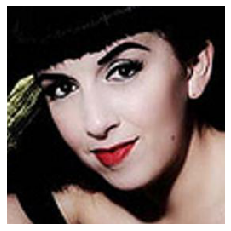

In [85]:
pos=dataset[3].getPosmap()
plt.axis('off')
plt.imshow(pos/pos.max())
plt.show()
plt.axis('off')
plt.imshow(dataset[3].getImage())